# リッジ回帰とラッソ回帰

In [1]:
# Google　Colaboratory で実行する場合はインストールする
if "google.colab" in str(get_ipython()):
    !pip install japanize_matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [3]:
# 表示する文字サイズを調整
plt.rc("font", size=20)
plt.rc("legend", fontsize=16)
plt.rc("xtick", labelsize=14)
plt.rc("ytick", labelsize=14)

# 乱数
np.random.seed(777)

# 実験用の回帰データを作成
```{hint}
[sklearn.datasets.make_regression](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html)
```

- 予測に必要な特徴量 =  2次元(`n_informative` = 2)
- 冗長な特徴量あり

In [4]:
n_features = 5
n_informative = 2
X, y = make_regression(
    n_samples=500,
    n_features=n_features,
    n_informative=n_informative,
    noise=0.5,
    random_state=777,
)
X = np.concatenate([X, np.log(X + 100)], 1)  # 冗長な特徴量を追加する
y_mean = y.mean(keepdims=True)
y_std = np.std(y, keepdims=True)
y = (y - y_mean) / y_std

# 最小二乗法・リッジ回帰・ラッソ回帰モデルを学習
```{hint}
- [sklearn.pipeline.make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html)
- [sklearn.linear_model.LinearRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
- [sklearn.linear_model.Ridge](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge)
- [sklearn.linear_model.Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso)
```

それぞれのモデルについて、同じデータをつかって訓練します。

In [5]:
lin_r = make_pipeline(StandardScaler(with_mean=False), LinearRegression()).fit(X, y)
rid_r = make_pipeline(StandardScaler(with_mean=False), Ridge(alpha=2)).fit(X, y)
las_r = make_pipeline(StandardScaler(with_mean=False), Lasso(alpha=0.1)).fit(X, y)

# 各モデルの係数の値を比較

各係数の絶対値をプロットします。線形回帰は係数がほとんど０にならないことがグラフから見て取れます。
また、Lasso回帰は予測に必要な特徴量以外で係数＝０になっていることが確認できます。

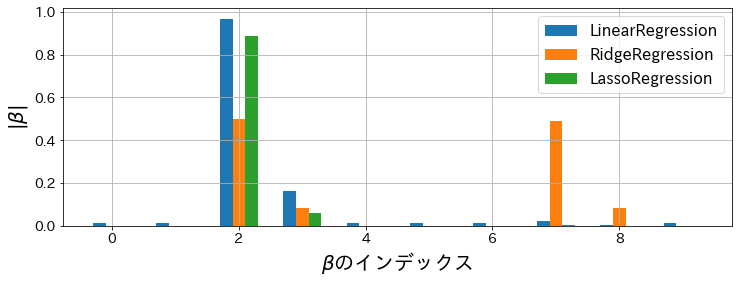

In [6]:
feat_index = np.array([i for i in range(X.shape[1])])

plt.figure(figsize=(12, 4))
plt.bar(
    feat_index - 0.2,
    np.abs(lin_r.steps[1][1].coef_),
    width=0.2,
    label="LinearRegression",
)
plt.bar(feat_index, np.abs(rid_r.steps[1][1].coef_), width=0.2, label="RidgeRegression")
plt.bar(
    feat_index + 0.2,
    np.abs(las_r.steps[1][1].coef_),
    width=0.2,
    label="LassoRegression",
)

plt.xlabel(r"$\beta$のインデックス")
plt.ylabel(r"$|\beta|$")
plt.grid()
plt.legend()